In [1]:
!pip install xgboost

You should consider upgrading via the 'c:\users\lamees\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install -U scikit-learn --user

You should consider upgrading via the 'c:\users\lamees\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('../Dataset/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# renaming data frame columns
df.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'}, inplace=True)

In [6]:
#converting GRE score
df['GRE Score'] = (130 + ((170 - 130) / (800 - 200)) * (df['GRE Score'].values - 200))
df['GRE Score'] = df['GRE Score'].astype(int)

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,139,118,4,4.5,4.5,9.65,1,0.92
1,2,138,107,4,4.0,4.5,8.87,1,0.76
2,3,137,104,3,3.0,3.5,8.00,1,0.72
3,4,138,110,3,3.5,2.5,8.67,1,0.80
4,5,137,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.to_csv('../Dataset/admission_predict_V1.2.csv', index = False)

In [9]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Splitting the data into train and test

In [68]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit'], axis=1)
y = df['Chance of Admit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True, random_state=42)

## Data Normalization

In [11]:
# #Import Libraries
# from sklearn.preprocessing import MinMaxScaler
# #----------------------------------------------------

# #MinMaxScaler for Data

# scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

## Training the model 

In [69]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error



models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")


for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    #print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
    print(name, model.score(X_test, y_test))
   

Results...
DecisionTree : 0.7170997898455582
Linear Regression : 0.862965908802418
RandomForest : 0.8332126916722851
KNeighbours : 0.6863824455983882
SVM : 0.6850274634260758
AdaBoostClassifier : 0.7920669978665666
GradientBoostingClassifier:  0.8193803575547379
Xgboost:  0.7968135240482461
BayesianRidge:  0.8629802192535944
ElasticNet:  0.2782990840945112
HuberRegressor:  0.8489551501704565


### Using RandomForestRegressor

In [70]:
model_RandF = RandomForestRegressor()
model_RandF.fit(X_train,y_train)

RandomForestRegressor()

In [71]:
predicted=model_RandF.predict(X_test)

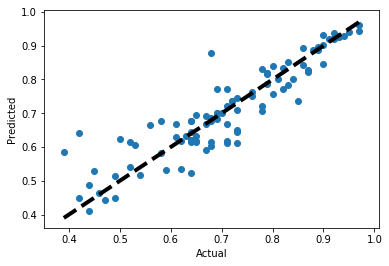

In [72]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

## Save the model

In [13]:
import joblib

In [135]:
# save the model to disk
filename = 'model_RandF.sav'
joblib.dump(model_RandF, filename)

['model_RandF.sav']

In [136]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)

print(result)

0.8527799292901824


In [137]:
import sklearn
print(sklearn.__version__)

0.24.1
